In [12]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

from aplpy import FITSFigure as aplfig
import astropy.units as u

import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

from matplotlib.colors import ListedColormap


### Read in files

In [3]:
nh3_cb_11 = fits.getdata('../datacubes/H-MM1_NH3_11_bls.fits')
nh3_cb_22 = fits.getdata('../datacubes/H-MM1_NH3_22_bls.fits')

In [2]:
npeaks, hd = fits.getdata('fitcubes/npeaks_cut5.fits', header=True)

parcb_1cmp = fits.getdata('fitcubes/H-MM1-mle-x1.fits')
parcb_2cmp = fits.getdata('fitcubes/H-MM1-mle-x2.fits')
parcb_3cmp = fits.getdata('fitcubes/H-MM1-mle-x3.fits')

In [39]:
npeaks_2cmp = npeaks.copy()
npeaks_2cmp[npeaks_2cmp == 3] = 2

In [19]:
figs_dir = 'figures/'
para_map_dir = 'para_maps/'

### Calculate moment0 maps

In [5]:
cb_header = fits.getheader('../datacubes/H-MM1_NH3_11_bls.fits')

In [6]:
ref_freq = cb_header['CRVAL3']
del_freq = cb_header['CDELT3']

In [7]:
chan_width_km = ((del_freq/ref_freq) * 299792458) / 1000.

In [8]:
# cb_header

In [9]:
mom0_11 = np.nansum(nh3_cb_11, axis=0) * chan_width_km
mom0_22 = np.nansum(nh3_cb_22, axis=0) * chan_width_km

#### write into files

In [258]:
hd_mom0 = hd.copy()
hd_mom0['bunit'] = 'K km/s'

fits.writeto(para_map_dir + 'mom0_11.fits', mom0_11, hd_mom0)
fits.writeto(para_map_dir + 'mom0_22.fits', mom0_22, hd_mom0)

#### read moment 0 maps from files

In [259]:
mom0_11 = fits.getdata(para_map_dir + 'mom0_11.fits')
mom0_22 = fits.getdata(para_map_dir + 'mom0_22.fits')

In [25]:
def setup_plot( fig, cmap='inferno', vmin=0, vmax=10., col_text='Sample (Jy/beam)', colbr_loc='top', 
               beam_color='green', clrscl_stretch='linear', sclbr=0.2, sclbr_loc='bottom right', sclbr_clr='k', 
               x_txt=0.1, y_txt=0.1, lbl_text='L1688', label_col='k', lbl_size=15):
    """
    sets up a aplpy FITSfigure instance in a presentable way
    
    inputs
    
    fig            : an aplpy FITSfigure instance 
    cmap           : colourmap for the figure, default is 'inferno'
    vmin, vmax     : lower and upper limits of the colourmap
    col_text       : text for the colourbar, default is  'Sample (Jy/beam)'
    colbr_loc      : location of the colour bar. Default is 'top'
    beam_colour    : colour of the beam, default is green
    clrscl_stretch : style of colourscale. default is 'linear'
    sclbr          : length of the scalebar (in pc), default is 0.2
    sclbr_loc      : location of the scale bar. Default is 'bottom right'
    x_txt, y_txt   : location of the text on the figure, default is (0.1, 0.1)
    lbl_text       : label to be put on the figure, default is 'L1688'
    label_col      : colour of the label text, default is black
    lbl_size       : size of the label text, default is 15
    
    """

    fig.show_colorscale( cmap=cmap, vmin=vmin, vmax=vmax,stretch=clrscl_stretch)
    
    fig.add_colorbar()
    fig.colorbar.show(location=colbr_loc,axis_label_text=col_text)
    
    fig.add_beam(color=beam_color)
    
    distance = 138.4 *u.pc
    scale=(sclbr*u.pc/distance*u.rad).to(u.deg)
    fig.add_scalebar(scale, label=str(sclbr)+' pc', color=sclbr_clr, location=sclbr_loc)
    
    fig.ticks.set_color('black')
    
    fig.add_label(x_txt, y_txt, lbl_text, relative=True,color=label_col,size=lbl_size)
    
    return fig

INFO: Auto-setting resolution to 24.3318 dpi [aplpy.core]


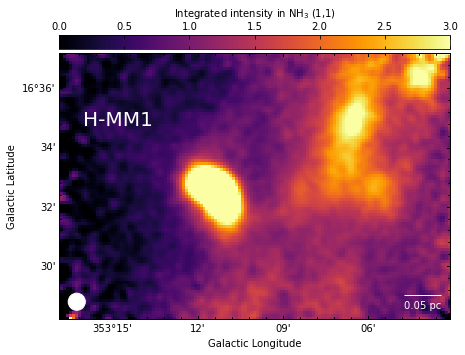

In [28]:
fig = aplfig(fits.PrimaryHDU(data=mom0_11, header=hd),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=3, col_text = r'Integrated intensity in NH$_3$ (1,1)', 
                 beam_color='w', sclbr=0.05, x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='w', 
                 sclbr_clr='w', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.savefig(figs_dir + 'mom0_11.pdf')

INFO: Auto-setting resolution to 24.3318 dpi [aplpy.core]


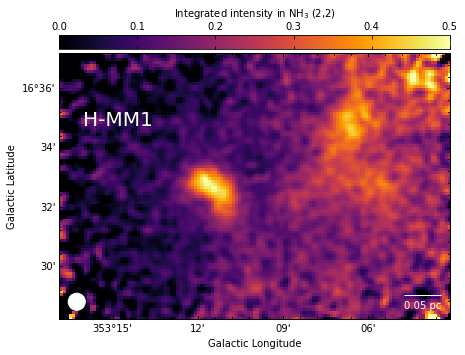

In [30]:
fig = aplfig(fits.PrimaryHDU(data=mom0_22, header=hd),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=0.5, col_text = r'Integrated intensity in NH$_3$ (2,2)', 
                 beam_color='w', sclbr=0.05, x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='w', 
                 sclbr_clr='w', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.savefig(figs_dir + 'mom0_22.pdf')

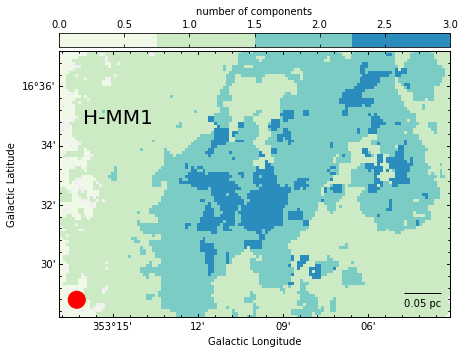

In [15]:
fig = aplfig(fits.PrimaryHDU(data=npeaks, header=hd),figsize=(7,7))


cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4', '#2b8cbe']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=0, vmax=3, col_text = r'number of components', beam_color='r', sclbr=0.05, 
                 x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='k', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

# fig.savefig(figs_dir + 'npeaks.pdf')

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


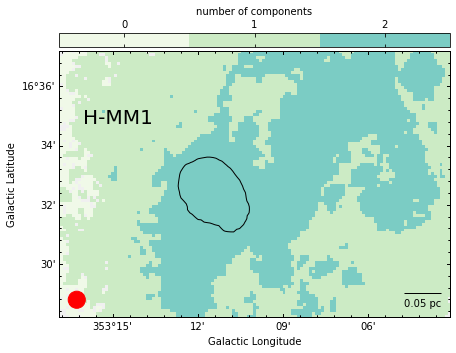

In [221]:
fig = aplfig(fits.PrimaryHDU(data=npeaks_2cmp, header=hd),figsize=(7,7))

cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=-0.5, vmax=2.5, col_text = r'number of components', beam_color='r', sclbr=0.05, 
                 x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='k', lbl_size=20, colbr_loc='top')

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.colorbar.set_ticks([0, 1, 2])

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

# for i in range(len(labels)):
#     # labels
#     fig.add_label( ra_list_text[i], dec_list_text[i], labels[i], color='k', size=14, weight=500, 
#                   bbox=dict(boxstyle="circle", fc="0.8", alpha=1))
#     # arrows pointing to the pixels
#     fig.show_arrows(ra_list_text, dec_list_text, dra_list, ddec_list, head_width=2, width=0.1, color='k')

fig.savefig(figs_dir + 'npeaks_2cmp.pdf', dpi=100)

## Plot figures reprojected in RA-Dec

#### find image centre in RA-Dec

In [117]:
# from astropy.coordinates import SkyCoord

In [118]:
# cent_gal = SkyCoord(l=hd['crval1']*u.degree, b=hd['crval2']*u.degree, frame='galactic')
# cent_radec = cent_gal.transform_to('fk5')

#### create footprint header in RA-Dec for reprojection

In [250]:
# hd_ra_dec = hd.copy()

# hd_ra_dec['naxis1'] = 150
# hd_ra_dec['naxis2'] = 150

# hd_ra_dec['crpix1'] = 75
# hd_ra_dec['crpix2'] = 75

# hd_ra_dec['ctype1'] = 'RA---TAN'
# hd_ra_dec['ctype2'] = 'DEC--TAN'

# hd_ra_dec['OBSRA'] = cent_radec.ra.value
# hd_ra_dec['OBSDEC'] = cent_radec.dec.value

# hd_ra_dec['crval1'] = cent_radec.ra.value
# hd_ra_dec['crval2'] = cent_radec.dec.value


## reproject parameter maps to RA-Dec

In [109]:
# from reproject import reproject_interp

### cycle through parameter maps

In [271]:
# npeaks_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=npeaks_2cmp, header=hd), hd_ra_dec)

# mom0_11_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=mom0_11, header=hd), hd_ra_dec)
# mom0_22_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=mom0_22, header=hd), hd_ra_dec)

# sig_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow.fits')[0], hd_ra_dec)
# vel_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow.fits')[0], hd_ra_dec)
# tk_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_narrow.fits')[0], hd_ra_dec)

# sig_narrow_blue_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow_blue.fits')[0], hd_ra_dec)
# vel_narrow_blue_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow_blue.fits')[0], hd_ra_dec)
# sig_narrow_red_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow_red.fits')[0], hd_ra_dec)
# vel_narrow_red_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow_red.fits')[0], hd_ra_dec)

# sig_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_broad.fits')[0], hd_ra_dec)
# vel_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_broad.fits')[0], hd_ra_dec)
# tk_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_broad.fits')[0], hd_ra_dec)

# mach_number_1cmp_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'mach_number_1cmp.fits')[0], hd_ra_dec)

#### write out the reprojected parameter maps

In [260]:
# para_map_repr_dir = 'para_maps_repr/'

In [273]:
# fits.writeto(para_map_repr_dir + 'npeaks_repr.fits', npeaks_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'mom0_11_repr.fits', mom0_11_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'mom0_22_repr.fits', mom0_22_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_narrow_repr.fits', sig_narrow_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_repr.fits', vel_narrow_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'tk_narrow_repr.fits', tk_narrow_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_narrow_blue_repr.fits', sig_narrow_blue_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_blue_repr.fits', vel_narrow_blue_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'sig_narrow_red_repr.fits', sig_narrow_red_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_red_repr.fits', vel_narrow_red_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_broad_repr.fits', sig_broad_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_broad_repr.fits', vel_broad_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'tk_broad_repr.fits', tk_broad_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'mach_number_1cmp_repr.fits', mach_number_1cmp_repr, hd_ra_dec, overwrite=True)


#### read in reprojected maps

In [274]:
para_map_repr_dir = 'para_maps_repr/'

In [276]:
npeaks_repr, hd_repr = fits.getdata(para_map_repr_dir + 'npeaks_repr.fits', header=True)

mom0_11_repr = fits.getdata(para_map_repr_dir + 'mom0_11_repr.fits')
mom0_22_repr = fits.getdata(para_map_repr_dir + 'mom0_22_repr.fits')

mach_number_1cmp_repr = fits.getdata(para_map_repr_dir + 'mach_number_1cmp_repr.fits')

sig_narrow_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_repr.fits')
vel_narrow_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_repr.fits')
tk_narrow_repr = fits.getdata(para_map_repr_dir + 'tk_narrow_repr.fits')

sig_narrow_blue_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_blue_repr.fits')
vel_narrow_blue_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_blue_repr.fits')
sig_narrow_red_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_red_repr.fits')
vel_narrow_red_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_red_repr.fits')

sig_broad_repr = fits.getdata(para_map_repr_dir + 'sig_broad_repr.fits')
vel_broad_repr = fits.getdata(para_map_repr_dir + 'vel_broad_repr.fits')
tk_broad_repr = fits.getdata(para_map_repr_dir + 'tk_broad_repr.fits')

### make figures for reprojected parameter map 

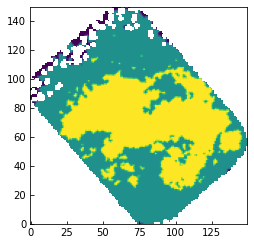

In [290]:
plt.imshow(npeaks_repr, origin='lower')

#### npeaks

##### show example spectra in selected pixels

In [285]:
from astropy.wcs import WCS
from matplotlib.patches import Circle

In [286]:
wcs = WCS(hd_repr)

In [300]:
# x,y co-ordinates of the positions chosen for the example spectra
xlist = np.array([60, 100, 75])
ylist = np.array([80, 70, 120])

# lengths of the arrows in x- and y-axes
dxlist = np.array([30, 15, -40])
dylist = np.array([10, -40, 20])

# number labels of the positions (with 1-, 2-, and 3-components detected, respectively)
labels = np.array([2, 3, 1])

# calculate positions of markers and lengths of arrows in world co-ordinates
ra_list, dec_list = wcs.all_pix2world(xlist, ylist, 0)                                 # position of pixel
ra_list_text, dec_list_text = wcs.all_pix2world(xlist + dxlist, ylist + dylist, 0)     # position of marker
dra_list = ra_list - ra_list_text                                                      # length of arrow in RA
ddec_list = dec_list - dec_list_text                                                   # length of arrow in Dec

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


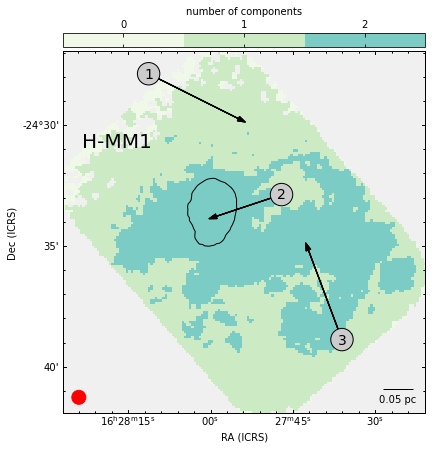

In [301]:
fig = aplfig(fits.PrimaryHDU(data=npeaks_repr, header=hd_repr),figsize=(7,7))

cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=-0.5, vmax=2.5, col_text = r'number of components', beam_color='r', sclbr=0.05, 
                 x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='k', lbl_size=20, colbr_loc='top')

# fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.colorbar.set_ticks([0, 1, 2])

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

for i in range(len(labels)):
    # labels
    fig.add_label( ra_list_text[i], dec_list_text[i], labels[i], color='k', size=14, weight=500, 
                  bbox=dict(boxstyle="circle", fc="0.8", alpha=1))
    # arrows pointing to the pixels
    fig.show_arrows(ra_list_text, dec_list_text, dra_list, ddec_list, head_width=2, width=0.1, color='k')

fig.savefig(figs_dir + 'npeaks_2cmp_repr_with_example_pix.pdf', dpi=100)